In [138]:
#import packages
import os
import pandas as pd
import numpy as np
from numpy import mean, std, cov 
from numpy.random import seed, randn
import random as rd
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot

from __future__ import division 
import sys
import scipy
from math import sqrt
import scipy.stats as stats 
from scipy.stats import t, pearsonr, sem
import seaborn as sns
from statistics import mean, stdev

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [139]:
#set paths

path = os.getcwd()
print(path)

/Users/melanieruiz/Library/CloudStorage/GoogleDrive-mruiz@adelphi.edu/My Drive/WTP_data/PCA


In [140]:

print(sys.executable)
!{sys.executable} -m pip install homebrew

/Users/melanieruiz/opt/anaconda3/bin/python


In [141]:
# #load dataset for study 2
# study2 = pd.read_csv(r'WTP_master_study2_4PCA.csv', encoding='utf-8-sig')
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# pca_df = pd.DataFrame()

# study2['PCA_PC1'] = pca_df['PC1']
# print(study2)

#import excel file containing data summary

#load dataset for all WTP subs
#wtpdata = pd.read_csv(path + r'/WTP_master_ALLdata_4PCA.csv', encoding='utf-8-sig')
wtpdata = pd.read_csv('/Users/melanieruiz/Library/CloudStorage/GoogleDrive-mruiz@adelphi.edu/My Drive/WTP_data/WTP_master_SHORT.csv', encoding='utf-8-sig')
pd.set_option("display.max_rows", None, "display.max_columns", None)
#import excel file containing data summary
wtpdata= wtpdata.reset_index(drop=True)

wtpdata= wtpdata[wtpdata['phase']== 1]
print(wtpdata)

     subnum                     subid type  phase  balanced  dem_AGE  dem_SEX  \
0         1  549ea92efdf99b4ffa5fa208    O      1         0     35.0      2.0   
1         2  55a43687fdf99b7da1908e0f    O      1         0     33.0      2.0   
2         3  55ea70c37480920010aa9982    O      1         0     33.0      1.0   
3         4  56259489ed6e5a0005c80fde    O      1         1     35.0      2.0   
4         5  566c9284d408ea000519c6d7    O      1         0     31.0      1.0   
5         6  56f745653bd969000d170c15    O      1         0     23.0      1.0   
6         7  57e972d7c3e5930001447bb1    O      1         0     24.0      2.0   
7         8  58060d08b869700001d70b8c    O      1         1     33.0      1.0   
8         9  58ab75c4ef58a9000119d16c    O      1         0     25.0      2.0   
9        10  5914b7b50a4b9d0001add64f    O      1         1     33.0      1.0   
10       11  5a78e410ae9a0b0001a97274    O      1         1     30.0      2.0   
11       12  5adbc051f6b58c0

In [142]:
ex = pd.read_csv(path + r'/WTP_master_ALLdata_4PCA.csv', encoding='utf-8-sig')
print(ex)

                       dem_ID  AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
0    549ea92efdf99b4ffa5fa208  26           0             0          0   
1    55a43687fdf99b7da1908e0f  16           0             0          0   
2    55ea70c37480920010aa9982  17           0             0          0   
3    56259489ed6e5a0005c80fde  37          26            20         11   
4    566c9284d408ea000519c6d7   5           0             0          0   
5    56f745653bd969000d170c15  32           0             0          0   
6    57e972d7c3e5930001447bb1  23           0             0          0   
7    58060d08b869700001d70b8c  22          16            20         11   
8    58ab75c4ef58a9000119d16c  20           0             0          0   
9    5914b7b50a4b9d0001add64f  24           0             0          0   
10   5a78e410ae9a0b0001a97274  20          19            15          7   
11   5adbc051f6b58c0001fa3bbe  22          26            18          9   
12   5af529ca222e4d0001878444  16     

In [143]:
#extract column of participant ids and drop from dataframe
ids = wtpdata['subid']
wtpdata = wtpdata.drop(['subid', 'type', 'phase','balanced','dem_AGE', 'dem_SEX', 'dem_GENDER', 'dem_ETHNICITY', 'dem_RACE', 'avg_spent_social', 'avg_spent_nonsocial',  
        'total_spent_social', 'total_spent_nonsocial',  'prop_social',  'prop_nonsocial', 'moresocial',  'prop_moresocial',  'spent'  ,'total_bonus', 'PC1','PC2','PC3'], axis=1)
#store id column in variable called "measures"
measures = wtpdata.columns

In [144]:
#add id column as the index in the dataframe
data = pd.DataFrame(data=wtpdata)
data.index = ids
print(data)

                          subnum  AQ  BISBAS_BIS  BISBAS_BASRR  BISBAS_FS  \
subid                                                                       
549ea92efdf99b4ffa5fa208       1  26         0.0           0.0        0.0   
55a43687fdf99b7da1908e0f       2  16         0.0           0.0        0.0   
55ea70c37480920010aa9982       3  17         0.0           0.0        0.0   
56259489ed6e5a0005c80fde       4  37        26.0          20.0       11.0   
566c9284d408ea000519c6d7       5   5         0.0           0.0        0.0   
56f745653bd969000d170c15       6  32         0.0           0.0        0.0   
57e972d7c3e5930001447bb1       7  23         0.0           0.0        0.0   
58060d08b869700001d70b8c       8  22        16.0          20.0       11.0   
58ab75c4ef58a9000119d16c       9  20         0.0           0.0        0.0   
5914b7b50a4b9d0001add64f      10  24         0.0           0.0        0.0   
5a78e410ae9a0b0001a97274      11  20        19.0          15.0        7.0   

In [145]:
#sample size
sample_size = len(wtpdata)
print(sample_size)

293


In [146]:
#transpose dataframe so that the rows represent measures and columns represent each participant
data = data.transpose()
print(data)

subid                   549ea92efdf99b4ffa5fa208  55a43687fdf99b7da1908e0f  \
subnum                                  1.000000                  2.000000   
AQ                                     26.000000                 16.000000   
BISBAS_BIS                              0.000000                  0.000000   
BISBAS_BASRR                            0.000000                  0.000000   
BISBAS_FS                               0.000000                  0.000000   
BISBAS_BASD                             0.000000                  0.000000   
BRCS                                   14.000000                 16.000000   
CESD                                   11.000000                  0.000000   
COVIDexperience_score                  20.000000                 17.000000   
COVIDimpacts_score                     66.000000                 56.000000   
COVIDpsychstress_score                  8.000000                 18.000000   
COVIDthreat_score                      28.000000                

In [147]:
#return 1st five values of dataframe
print(data.head())
#return dimensions of our data matrix: 28 measures by 226 participants
print(data.shape)

subid         549ea92efdf99b4ffa5fa208  55a43687fdf99b7da1908e0f  \
subnum                             1.0                       2.0   
AQ                                26.0                      16.0   
BISBAS_BIS                         0.0                       0.0   
BISBAS_BASRR                       0.0                       0.0   
BISBAS_FS                          0.0                       0.0   

subid         55ea70c37480920010aa9982  56259489ed6e5a0005c80fde  \
subnum                             3.0                       4.0   
AQ                                17.0                      37.0   
BISBAS_BIS                         0.0                      26.0   
BISBAS_BASRR                       0.0                      20.0   
BISBAS_FS                          0.0                      11.0   

subid         566c9284d408ea000519c6d7  56f745653bd969000d170c15  \
subnum                             5.0                       6.0   
AQ                                 5.0        

In [148]:
#STEP 1: before PCA, scale and center the data
#Standardizarion ensures the range of the continous inital variables each equally contributes to the analysis
scaled_data = preprocessing.scale(data.T)
# print(scaled_data)
#alternative function: StandardScaler().fit_transform(data.T)
type(scaled_data)
scaled_df = pd.DataFrame(data= scaled_data)
# print(scaled_df)
scaled_df.insert(0,'id',ids)
print(scaled_df)

                           id         0         1         2         3  \
0    549ea92efdf99b4ffa5fa208 -1.726149  0.726983 -1.109411 -1.143511   
1    55a43687fdf99b7da1908e0f -1.714326 -0.752226 -1.109411 -1.143511   
2    55ea70c37480920010aa9982 -1.702504 -0.604305 -1.109411 -1.143511   
3    56259489ed6e5a0005c80fde -1.690681  2.354113  1.193448  1.127236   
4    566c9284d408ea000519c6d7 -1.678858 -2.379355 -1.109411 -1.143511   
5    56f745653bd969000d170c15 -1.667035  1.614508 -1.109411 -1.143511   
6    57e972d7c3e5930001447bb1 -1.655212  0.283221 -1.109411 -1.143511   
7    58060d08b869700001d70b8c -1.643389  0.135300  0.307733  1.127236   
8    58ab75c4ef58a9000119d16c -1.631566 -0.160542 -1.109411 -1.143511   
9    5914b7b50a4b9d0001add64f -1.619743  0.431141 -1.109411 -1.143511   
10   5a78e410ae9a0b0001a97274 -1.607920 -0.160542  0.573448  0.559549   
11   5adbc051f6b58c0001fa3bbe -1.596097  0.135300  1.193448  0.900162   
12   5af529ca222e4d0001878444 -1.584274 -0.752226  

In [149]:
#in sklearn, variation is calculated as:
#(measurements - mean)^2 / number of measurements

In [150]:

#create PCA object
#sklearn uses objects that can be trained using one dataseet and applied to another dataset
pca = PCA()

#call fit method on scaled data, where all PCA math occurs (i.e. calculate loading scores and the variation each principal component accounts for)
pca.fit(scaled_data)


#generate coordinates for PCA graph based on loading scores and scaled data
pca_data = pca.transform(scaled_data)
print(pca_data)

[[-7.27800004e-01  2.75586481e+00 -3.98447624e-01 ... -4.92246673e-01
  -2.32631922e-02 -6.78881784e-17]
 [ 2.55933862e+00  1.33032268e+00  1.70617704e-01 ... -2.42387548e-01
   1.06458972e-01  1.02705182e-16]
 [ 3.35134213e+00  2.95278832e+00 -3.73770185e+00 ...  1.17579023e-01
   7.29960091e-02  1.95612014e-16]
 ...
 [ 1.93412556e+00 -2.14540208e+00 -2.62796245e+00 ... -6.01046913e-01
  -1.55158738e-03  2.77555756e-16]
 [-5.27413396e-01 -2.99327847e+00  2.39263146e+00 ... -1.66459361e-02
  -1.45396162e-01  5.55111512e-17]
 [-2.62450194e-01 -2.11261086e+00 -8.18571896e-01 ...  3.23262779e-03
   2.05874411e-01 -8.32667268e-17]]


In [151]:
#drawing a graph
#create a screeplot to see how many principal components should go into the final plot


In [152]:
#calculate the percentage of variation that each principal component accounts for
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

type(per_var)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)

In [153]:
#now create labels for scree plot, 1 label per principal component; PC1, PC2, etc
labels = ['PC' +str(x) for x in range(1,len(per_var)+1)]


In [154]:
percs = pd.DataFrame(per_var)
print(per_var)

[23.1 14.3 11.2  7.5  5.8  4.3  4.1  3.8  3.   2.8  2.5  2.4  2.3  2.
  1.8  1.7  1.3  1.2  1.1  1.1  0.7  0.7  0.5  0.4  0.3  0.1  0. ]


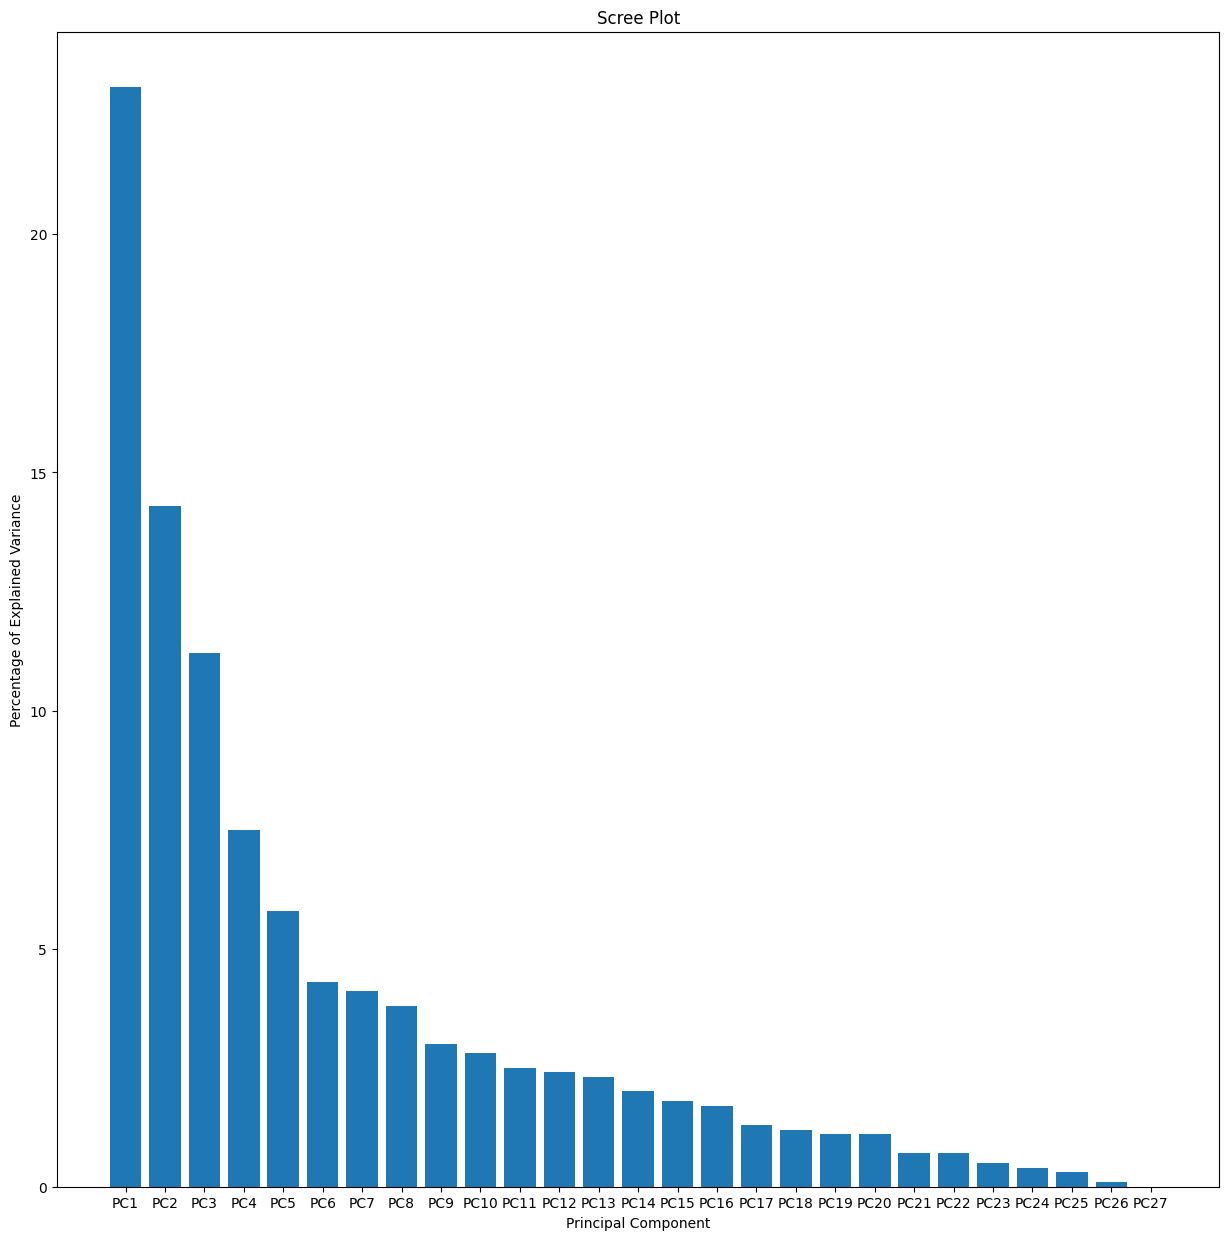

<Figure size 640x480 with 0 Axes>

In [178]:
#use matplotlib to create a bar plot
plt.figure(figsize=(15,15))
plt.bar(x=range(1,len(per_var)+1), height= per_var,tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()
plt.savefig('WTP_PCA_screeplot.png')

In [156]:
per_var2 = list(per_var[0:3])
print(per_var2)
labels2 = ['PC' +str(x) for x in range(1,len(per_var2)+1)]


[23.1, 14.3, 11.2]


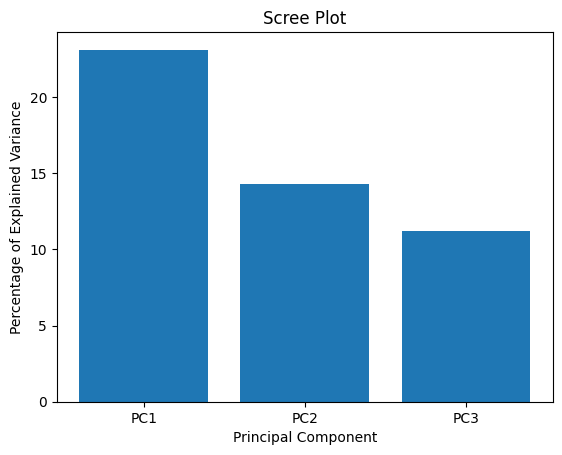

In [157]:
#use matplotlib to create a bar plot
# plt.figure(figsize=(,15))
plt.bar(x=range(1,len(per_var2)+1), height= per_var2,tick_label=labels2)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [158]:
#almost all of the variation is along PC1, so a 2d graph using PC1 and PC2 should do a good job representing the original data

In [159]:
#draw a PCA plot
#first, put the new coordinates created by pca.transform(scaled.data)
#into a matrix where the rows have the participant ids and the columns have PC labels
pca_df = pd.DataFrame(pca_data, index=ids,columns=labels)
print(pca_df)
pca_df.to_csv('WTP_PCA_allsubjects_new.csv')


                               PC1       PC2       PC3       PC4       PC5  \
subid                                                                        
549ea92efdf99b4ffa5fa208 -0.727800  2.755865 -0.398448  2.646705 -1.614833   
55a43687fdf99b7da1908e0f  2.559339  1.330323  0.170618  0.653702 -1.917792   
55ea70c37480920010aa9982  3.351342  2.952788 -3.737702 -3.149825  1.694365   
56259489ed6e5a0005c80fde -0.954481 -1.453215 -1.172601  2.069952  1.537971   
566c9284d408ea000519c6d7  6.067381  0.898495  0.269546  1.488025  1.943405   
56f745653bd969000d170c15 -0.762519  3.230957 -0.156943 -0.561738  2.086910   
57e972d7c3e5930001447bb1 -2.248257  3.394784 -0.031930  1.433225 -0.558769   
58060d08b869700001d70b8c  0.621632 -1.093592 -1.365867  0.546621  1.904089   
58ab75c4ef58a9000119d16c  0.560779  2.717565  0.018704  2.172801  0.073152   
5914b7b50a4b9d0001add64f  0.309290  3.493364 -2.449291 -1.631499  0.840294   
5a78e410ae9a0b0001a97274  3.439727 -0.971265 -1.617454  1.002410

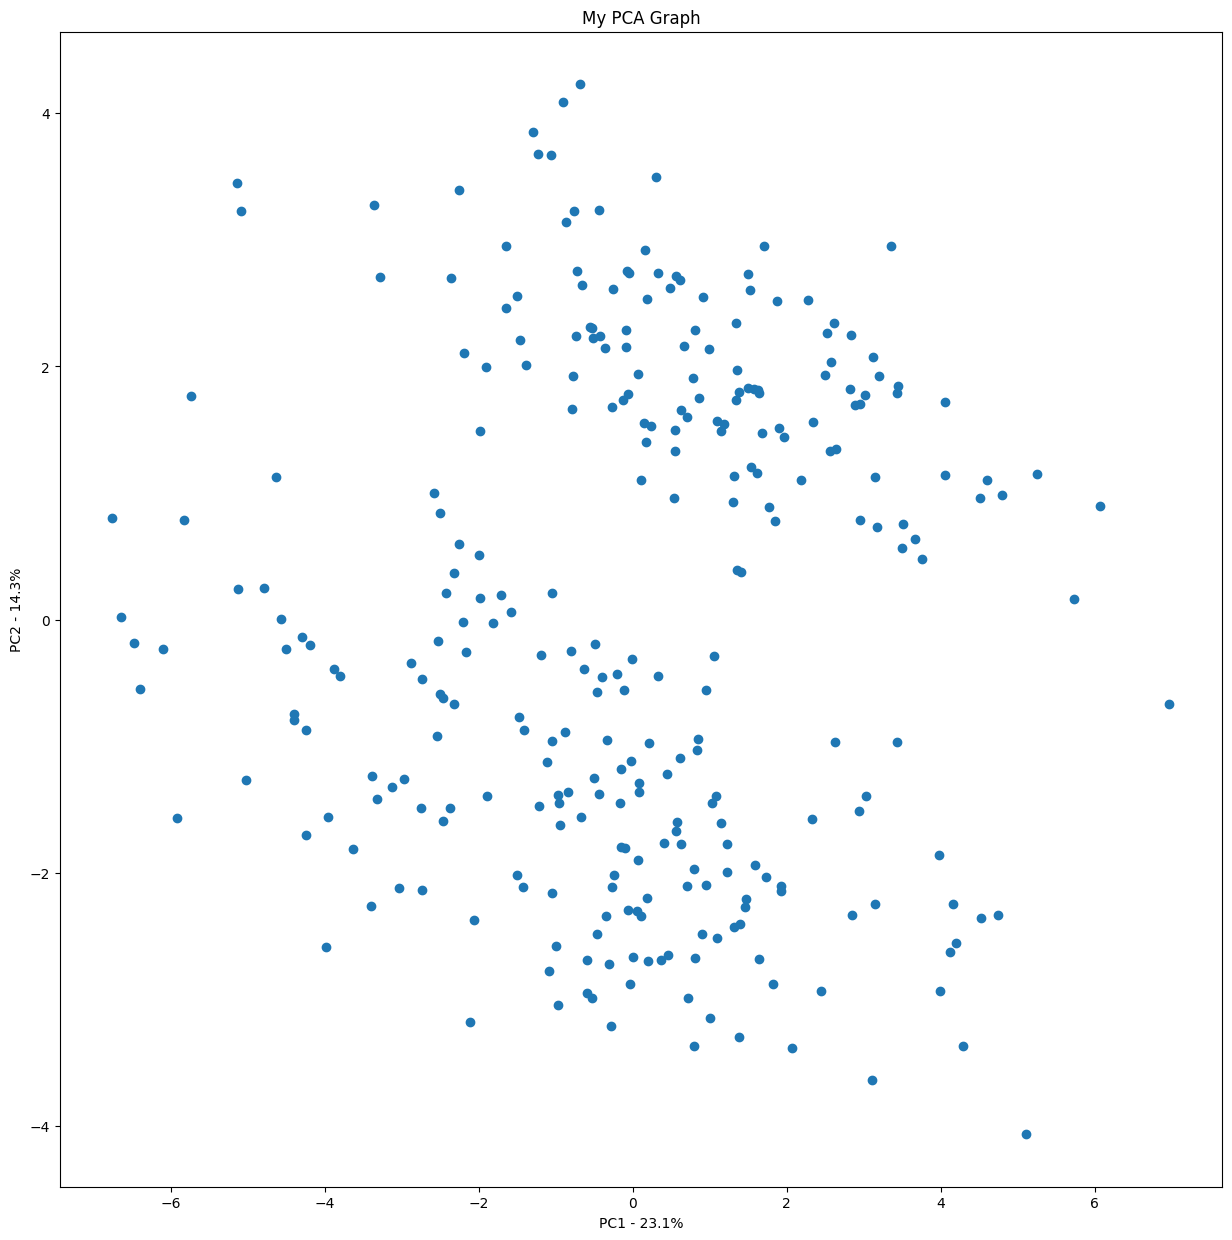

In [160]:
#Visualize the distribution of the samples
#draw a scatter plot
plt.figure(figsize=(15,15))
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
#add sample names to graph
# for sample in pca_df.index:
#     plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [161]:
# from pca import pca

# # Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
# model = pca(n_components=0.95)

# # Or reduce the data towards 2 PCs
# model = pca(n_components=2)

# # Fit transform
# results = model.fit_transform(scaled_data)

# # Plot explained variance
# fig, ax = model.plot()

# # Scatter first 2 PCs
# fig, ax = model.scatter()

# # Make biplot with the number of features
# fig, ax = model.biplot(n_feat=4)

In [162]:
#PC1
#The next step in our interpretation is to understand how our variables contribute to each of the principal components, and this is revealed by the loadings.
#look at the loading scores for PC1 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis

#loading scores- can be understood as the weights for each original variable when calculating the principal component

#  Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. 
# Negative loadings indicate a negative correlation. 
#Large (either positive or negative) loadings indicate that a variable has a strong effect on that principal component.


In [163]:
###All measures and their loading scores for PC 1

#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[0], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores.index.values
print(top_10_measures)

subnum                   -0.033521
AQ                       -0.256054
BISBAS_BIS               -0.183692
BISBAS_BASRR             -0.124035
BISBAS_FS                -0.116996
BISBAS_BASD              -0.095000
BRCS                      0.206060
CESD                     -0.334600
COVIDexperience_score     0.004420
COVIDimpacts_score       -0.075031
COVIDpsychstress_score    0.041643
COVIDthreat_score        -0.071313
IRI_FS                   -0.045664
IRI_EC                    0.108324
IRI_PD                   -0.152399
IRI_PT                    0.161727
LSAS                     -0.211868
LSAS_FEAR                -0.203992
LSAS_AVOIDANCE           -0.197570
Mood                      0.264144
MSPSS                     0.261100
MSSSF                    -0.139117
RSE                       0.311387
STAI                     -0.298634
UCLA_loneliness          -0.313502
UM_AFFILIATION            0.215589
UM_INTIMACY               0.132834
dtype: float64
['CESD' 'UCLA_loneliness' 'RSE' 'STAI' '

In [164]:
#PC1 - top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC1 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC1)
# PC1.to_csv('PC1.csv')

CESD                     -0.334600
UCLA_loneliness          -0.313502
RSE                       0.311387
STAI                     -0.298634
Mood                      0.264144
MSPSS                     0.261100
AQ                       -0.256054
UM_AFFILIATION            0.215589
LSAS                     -0.211868
BRCS                      0.206060
LSAS_FEAR                -0.203992
LSAS_AVOIDANCE           -0.197570
BISBAS_BIS               -0.183692
IRI_PT                    0.161727
IRI_PD                   -0.152399
MSSSF                    -0.139117
UM_INTIMACY               0.132834
BISBAS_BASRR             -0.124035
BISBAS_FS                -0.116996
IRI_EC                    0.108324
BISBAS_BASD              -0.095000
COVIDimpacts_score       -0.075031
COVIDthreat_score        -0.071313
IRI_FS                   -0.045664
COVIDpsychstress_score    0.041643
subnum                   -0.033521
COVIDexperience_score     0.004420
dtype: float64
     CESD  UCLA_loneliness       RSE    

In [165]:
###ALL measures and their loading scores for PC 2
#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[1], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores.index.values

subnum                   -0.213909
AQ                        0.103273
BISBAS_BIS               -0.408266
BISBAS_BASRR             -0.450449
BISBAS_FS                -0.445031
BISBAS_BASD              -0.439828
BRCS                     -0.138920
CESD                     -0.031905
COVIDexperience_score    -0.118451
COVIDimpacts_score        0.010555
COVIDpsychstress_score   -0.171690
COVIDthreat_score        -0.035797
IRI_FS                   -0.047475
IRI_EC                   -0.103691
IRI_PD                    0.082297
IRI_PT                   -0.141093
LSAS                     -0.017986
LSAS_FEAR                -0.004251
LSAS_AVOIDANCE           -0.029084
Mood                     -0.075845
MSPSS                    -0.124000
MSSSF                    -0.010776
RSE                      -0.098809
STAI                     -0.023569
UCLA_loneliness           0.074015
UM_AFFILIATION           -0.152544
UM_INTIMACY              -0.126841
dtype: float64


In [166]:
#PC2 -  top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC2 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
# print(PC2.columns)

BISBAS_BASRR             -0.450449
BISBAS_FS                -0.445031
BISBAS_BASD              -0.439828
BISBAS_BIS               -0.408266
subnum                   -0.213909
COVIDpsychstress_score   -0.171690
UM_AFFILIATION           -0.152544
IRI_PT                   -0.141093
BRCS                     -0.138920
UM_INTIMACY              -0.126841
MSPSS                    -0.124000
COVIDexperience_score    -0.118451
IRI_EC                   -0.103691
AQ                        0.103273
RSE                      -0.098809
IRI_PD                    0.082297
Mood                     -0.075845
UCLA_loneliness           0.074015
IRI_FS                   -0.047475
COVIDthreat_score        -0.035797
CESD                     -0.031905
LSAS_AVOIDANCE           -0.029084
STAI                     -0.023569
LSAS                     -0.017986
MSSSF                    -0.010776
COVIDimpacts_score        0.010555
LSAS_FEAR                -0.004251
dtype: float64


In [167]:
###All measures and their loading scores for PC 3

#look at the loading scores for PC2 to determine which measures had the largest influence
#... on separating the two clusters along the x-axis
#create series obj w/ the loading scores in PC1
loading_scores = pd.Series(pca.components_[2], index=measures)
print(loading_scores)
#sort loading scores based on their magnitude(absolute value)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
#get the names of the top 10 indexes (measure names )
top_10_measures = sorted_loading_scores.index.values

subnum                    0.151610
AQ                       -0.006775
BISBAS_BIS               -0.138364
BISBAS_BASRR             -0.156593
BISBAS_FS                -0.141522
BISBAS_BASD              -0.159588
BRCS                      0.098938
CESD                      0.056971
COVIDexperience_score     0.109981
COVIDimpacts_score        0.166560
COVIDpsychstress_score    0.118234
COVIDthreat_score         0.133520
IRI_FS                    0.147783
IRI_EC                    0.243391
IRI_PD                    0.163902
IRI_PT                    0.182754
LSAS                      0.396597
LSAS_FEAR                 0.392466
LSAS_AVOIDANCE            0.359832
Mood                      0.100123
MSPSS                     0.174073
MSSSF                     0.175704
RSE                       0.006697
STAI                      0.062818
UCLA_loneliness          -0.122988
UM_AFFILIATION            0.204807
UM_INTIMACY               0.297870
dtype: float64


In [168]:
#PC 3 print top 10 measures and their corresponding loading scores
print(loading_scores[top_10_measures])
PC3 = pd.DataFrame(loading_scores[top_10_measures]).transpose()
print(PC3.columns)

LSAS                      0.396597
LSAS_FEAR                 0.392466
LSAS_AVOIDANCE            0.359832
UM_INTIMACY               0.297870
IRI_EC                    0.243391
UM_AFFILIATION            0.204807
IRI_PT                    0.182754
MSSSF                     0.175704
MSPSS                     0.174073
COVIDimpacts_score        0.166560
IRI_PD                    0.163902
BISBAS_BASD              -0.159588
BISBAS_BASRR             -0.156593
subnum                    0.151610
IRI_FS                    0.147783
BISBAS_FS                -0.141522
BISBAS_BIS               -0.138364
COVIDthreat_score         0.133520
UCLA_loneliness          -0.122988
COVIDpsychstress_score    0.118234
COVIDexperience_score     0.109981
Mood                      0.100123
BRCS                      0.098938
STAI                      0.062818
CESD                      0.056971
AQ                       -0.006775
RSE                       0.006697
dtype: float64
Index(['LSAS', 'LSAS_FEAR', 'LSAS_AVOIDA

NameError: name 'pcamodel' is not defined

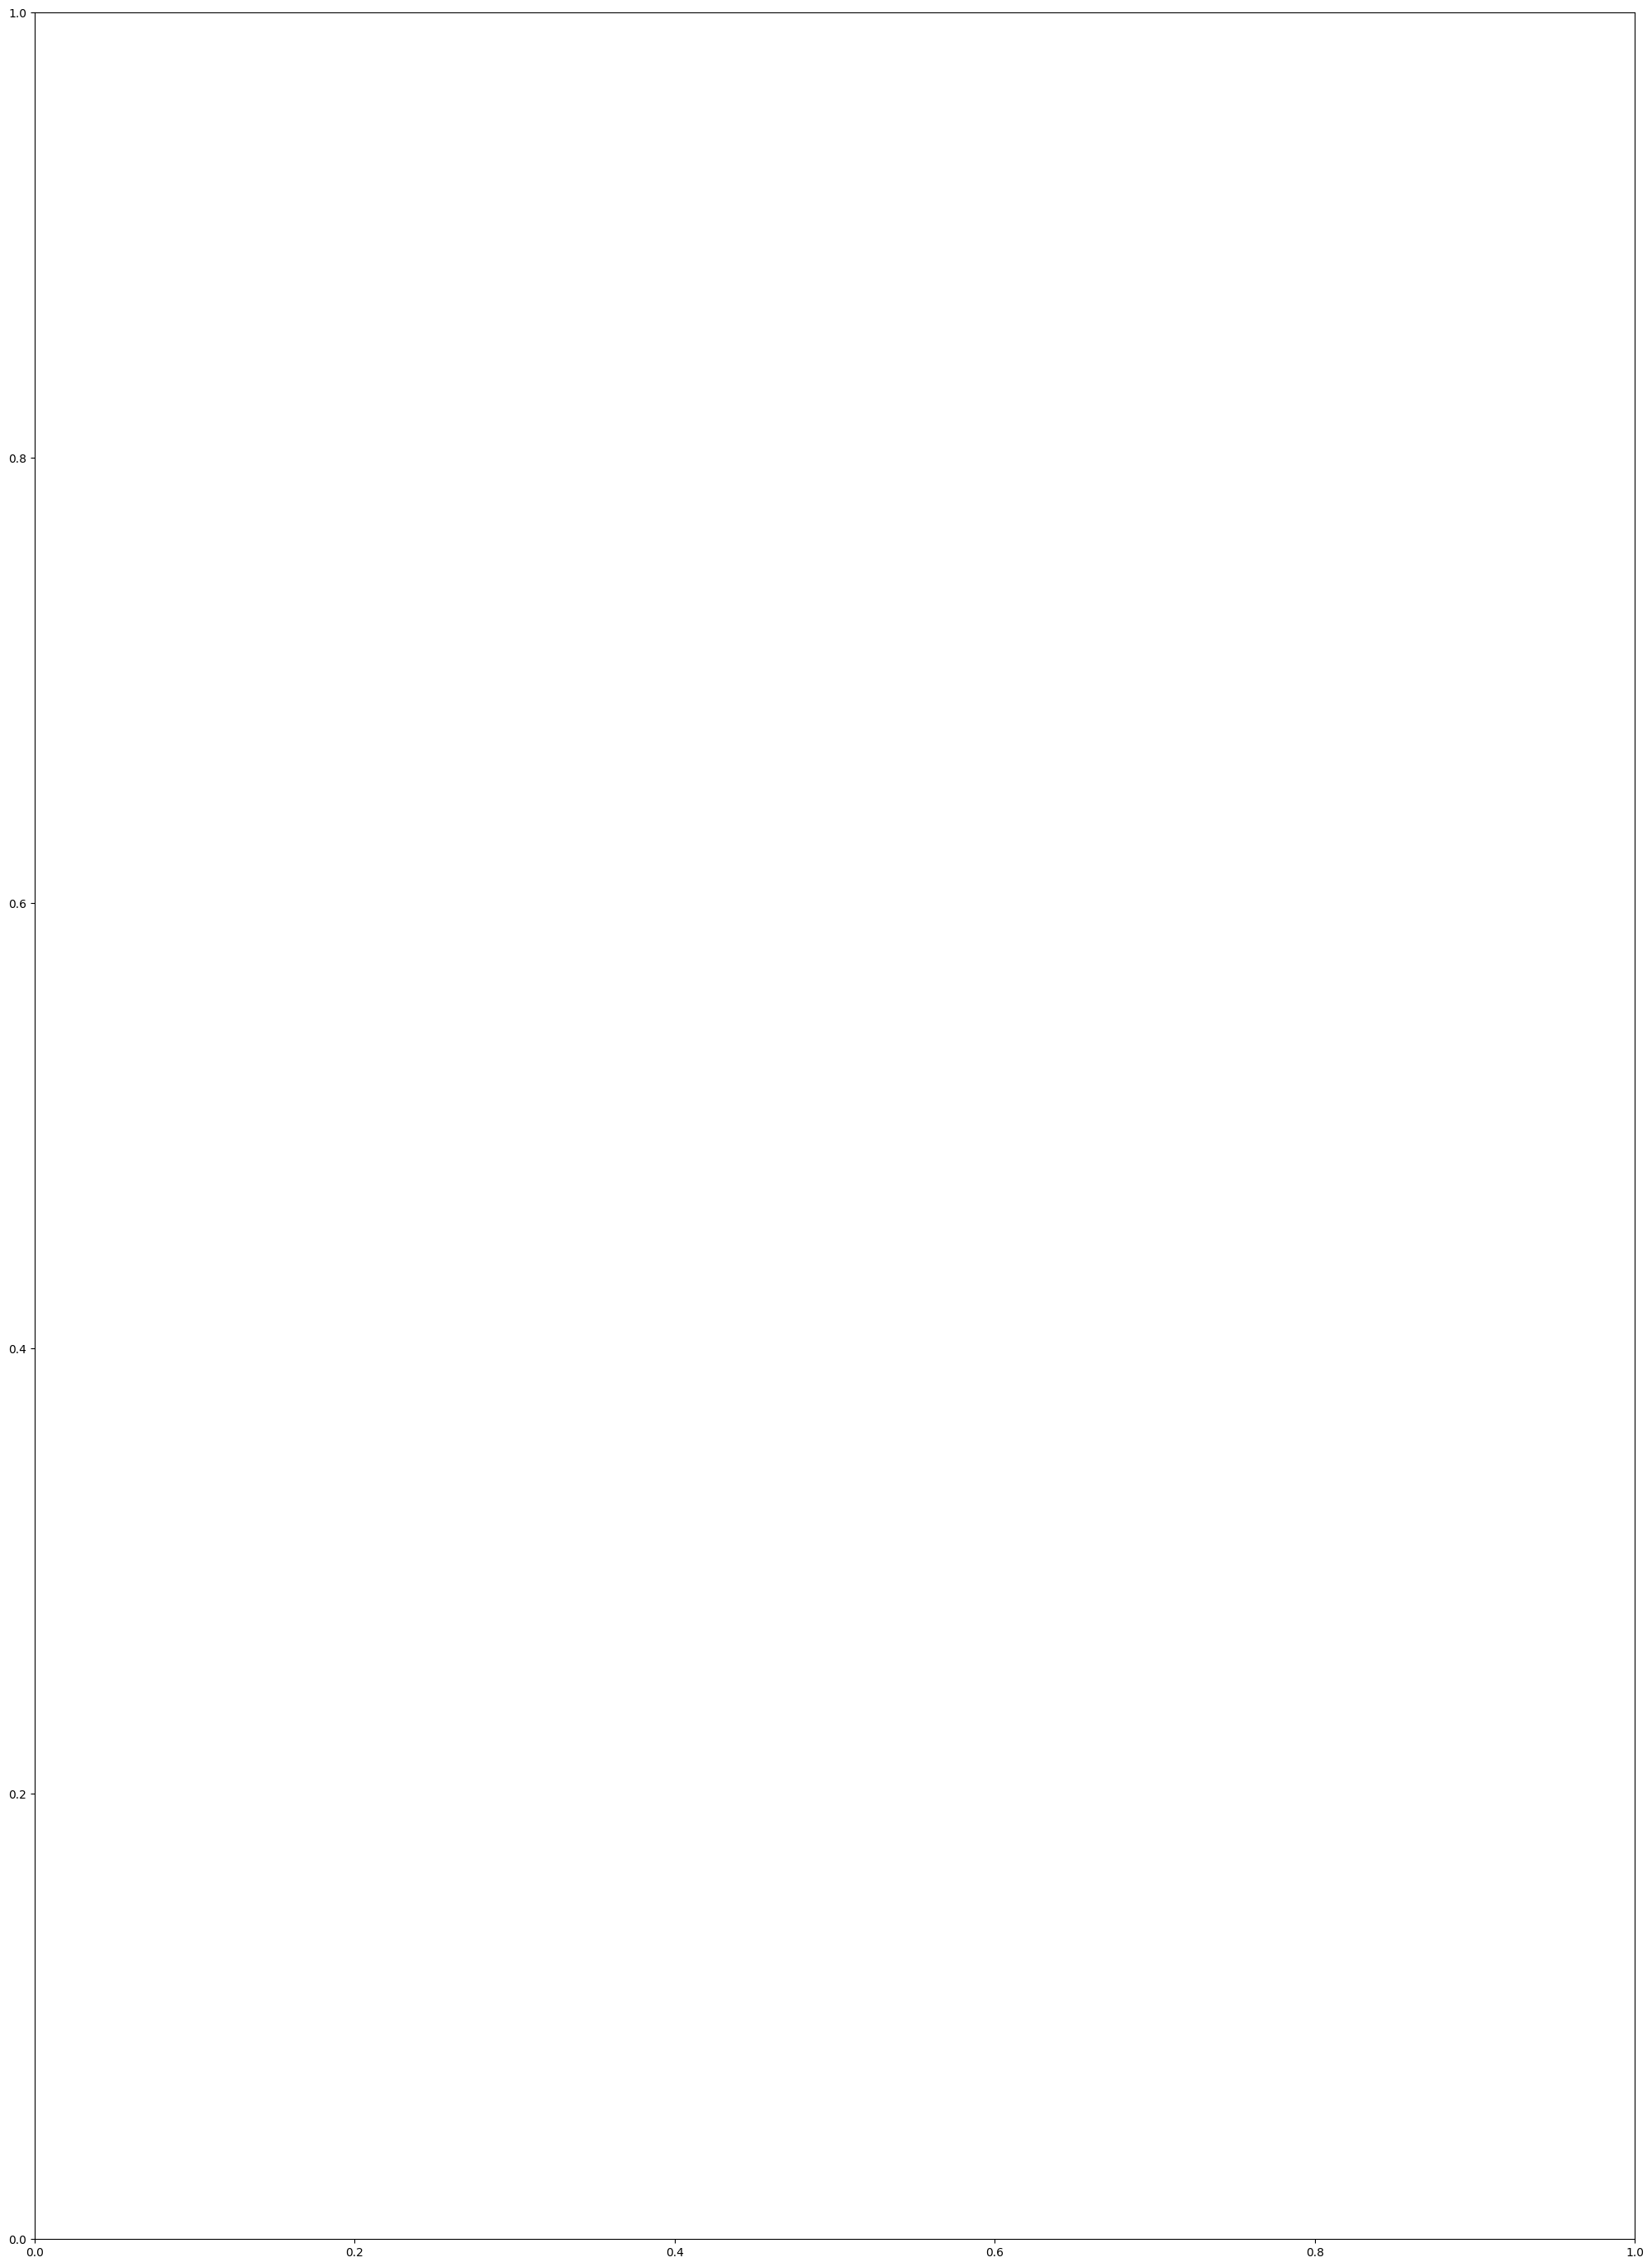

In [169]:
fig, ax = plt.subplots(figsize=(25,35)) 
ax = sns.heatmap(pcamodel.components_,
                 cmap='RdBu_r',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                 xticklabels=list(measures),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")


In [ ]:
###################################################################################################################

In [170]:
######################## GLM using PCA results################################

In [171]:
# #import excel file containing data summary for GLM
# import os
# data = pd.read_csv(r'/Volumes/GoogleDrive/My Drive/WTP_data/WTP_LONG_ALL.csv', encoding='utf-8-sig')
# pd.set_option("display.max_rows", None, "display.max_columns", None)


# data = data.loc[(data['balanced'] == 1)]
# data= data.reset_index(drop=True)


In [172]:
# #extract top 10 PC1 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
# col = ''
# for i in data.loc[:,PC1.columns]:
#     col = str(i) + ' + ' + col 
# PC1_col = col[:-2]   

In [173]:
# #run GLM - PC1
# formula = 'exp_chosen ~' + PC1_col
# PC1_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC1_model.summary())


In [174]:
############################################################################################

In [175]:
#PC2

In [176]:
# #extract top 10 PC2 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
# col = ''
# for i in data.loc[:,PC2.columns]:
#     col = str(i) + ' + ' + col 
# PC2_col = col[:-2]   

In [177]:
# #run GLM - PC2
# formula = 'exp_chosen ~' + PC2_col
# PC2_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC2_model.summary())

In [38]:
############################################################################################

In [39]:
#PC3

In [40]:
# #extract top 10 PC2 measures in the format for the GLM formula (i.e. measure 1 + measure2 + measure3+ ...)
# col = ''
# for i in data.loc[:,PC3.columns]:
#     col = str(i) + ' + ' + col 
# PC3_col = col[:-2]   

In [41]:
# #run GLM - PC3
# formula = 'exp_chosen ~ PC1 ' + PC3_col
# PC3_model = sm.formula.glm(formula = formula, data=data).fit()
# print(PC3_model.summary())

In [42]:
############################################################################################

In [43]:
# data_wPCA = data = pd.read_csv(r'/Volumes/GoogleDrive/My Drive/WTP_data/PCA/WTP_LONG_wPCA.csv', encoding='utf-8-sig')
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# print(data_wPCA.head())

In [44]:
# #GLM w/ PC1 individual scores

# formula = 'exp_chosen ~ PC1'
# PC1_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC1_model.summary())



In [45]:
# #GLM w/ PC2 individual scores

# formula = 'exp_chosen ~ PC2'
# PC2_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC2_model.summary())



In [46]:
# #GLM w/ PC3 individual scores

# formula = 'exp_chosen ~ PC3'
# PC3_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC3_model.summary())


In [47]:
# #GLM w/ PC1 + PC2 individual scores

# formula = 'exp_chosen ~ PC1 + PC2'
# PC1_2_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC1_2_model.summary())


In [48]:
# #GLM w/ PC1 + PC2 + PC3 individual scores

# formula = 'exp_chosen ~ PC1 + PC2 + PC3'
# PC1_2_3_model = sm.formula.glm(formula = formula, data=data_wPCA).fit()
# print(PC1_2_3_model.summary())

In [22]:
# # Install R and Rpy2
# !pip install homebrew

In [23]:
# Install R and Rpy2


# !pip install -q rpy2

# # Install LMER packages (THIS TAKES ABOUT 3~5 minutes)
# packnames = ('lme4', 'lmerTest', 'emmeans', "geepack")
# from rpy2.robjects.packages import importr
# from rpy2.robjects.vectors import StrVector
# utils = importr("utils")
# utils.chooseCRANmirror(ind=1)
# utils.install_packages(StrVector(packnames))
# %load_ext rpy2.ipython
# # Enable cell magic for Rpy2 interface
# %%R 
# # load LMER libraries
# library(lme4)
# library(lmerTest)

# # LMER model in R
# m<-lmer('exp_chosen ~ PC1 + PC2 + PC3 + (1|subid)', family = "binomial")
# print(summary(m))